In [11]:
%matplotlib inline

In [12]:
from matplotlib import pyplot as plt

In [13]:
import numpy as np
import os

In [14]:
#We have blue flowers[target <.5] and red flowers [target > .5]
#
#each point: [petal length, petal width, type]
data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

#should be red
mystery_flower = [4.5, 1]

In [15]:
#squeeze everything between 0 and 1
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [16]:
#sigmoid derived
def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

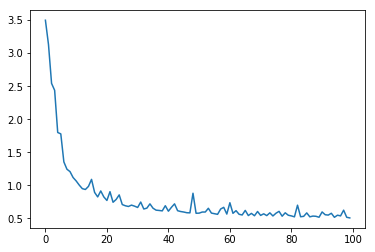

In [17]:
def train():
    #random init of weights
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    #z = w1*petal_length + w2*petal_width + b;
    iterations = 10000
    learning_rate = 0.1
    costs = [] # keep costs during training, see if they go down
    
    for i in range(iterations):
        # get a random point
        ri = np.random.randint(len(data))
        point = data[ri]
        
        #this is  0 z     target
        #   w1   / \ w2  b
        #   m1 0    0 m2
        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z) # networks prediction
        
        target = point[2]
        
        # cost for current random point
        cost = np.square(pred - target)
        
        # print the cost over all data points every 1k iterations
        if i % 100 == 0:
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
            costs.append(c)
    
        #slope_of_cost is cost derived with respect to our prediction
        dcost_dpred = 2 * (pred - target)
        #prediction derived with respect to z
        dpred_dz = sigmoid_p(z)
        #then z with respect to our params w1, w2, b
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1 
        
        #so, we'll have dcost_dpred*dpred_dz*dz_db or dw1 or dw2  
        dcost_dz = dcost_dpred * dpred_dz
        
        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db
        
        #Aim: b = b - learning_rate * slope_of_cost(b); w1 = w1 - learning_rate * slope_of_cost(w1); w2 = w2 - learning_rate * slope_of_cost(w2)
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db
        
    return costs, w1, w2, b

#Training the network // what will be clf.fit
costs, w1, w2, b = train()
#the spikes are the red flowers values that are really close to the blue ones
fig = plt.plot(costs)

In [18]:
#what will be clf.predict
def which_flower(length, width):
    z = length * w1 + width * w2 + b
    prediction = sigmoid(z)
    if prediction < .5:
        print("blue")
    else:
        print("red")

In [19]:
which_flower(4.5, 1)

red
